# Example Code for "Ultra-efficient causal deep learning for Dynamic CSA-AKI Detection Using Minimal Variables"

REACT (Real-time Evaluation and Anticipation with Causal disTillation): a causal deep learning approach that
combines the universal approximation abilities of neural networks with
causal discovery to develop REACT, a reliable and generalizable
model to predict a patient's risk of developing CSA-AKI within the next
48 hours.

## Import Utils and Set Up Environment

In [2]:
from run_example_utils import *

In [3]:
device = "cuda"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
np.random.seed(42)

## Load Example Dataset

The study incorporated data from five large-scale general hospitals: The
First and Third Medical Centers of the Chinese PLA General Hospital in
Beijing, China, were used for the derivation of the predictive model and
internal validation(from 2000 to 2021); For model external tests, we
utilized the Sixth and Seventh Medical Centers of the Chinese PLA
General Hospital, along with the Nanjing Drum Tower Hospital in Nanjing,
China (from 2000 to 2023). **Our cohort, comprising 54,896 patients,** was
selected from a pool of approximately 6.19 million individuals with 8.3
million visits treated at five major general hospitals.

Data underpinning this study are under restricted access and are not
freely available as they contain patients’ data, and specific clearance
from the ethics committee is required in each center. **So we release a example dataset with several patients with simulated data for reproducing our work.**

In [4]:
opt_gc_pred, log, test_dataset = prepare_example_model(OmegaConf.load(opj(os.getcwd(), "example/example.yaml")), device=device, mode="test")
load_dir = opj(os.getcwd(), "model_weights/6_var")
pred_model = Example_Prediction(opt_gc_pred, log, device=device)
pred_model.load_model(load_dir, test_dataset.dynamic_items, test_dataset.static_items)
patient_data_list = test_dataset.patient_data_list

/ssd/2/cyx/UNN/REACT/medical_pred_main.py:569: UserWarning: No train_val dataset.
  warnings.warn("No train_val dataset.")


Dy feat num =  87
St feat num =  10
Dy dim =  2
St dim =  2
T length =  168
Pred dim =  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Fetch Example Patient from the Dataset

In [5]:
example_patient_index = 3
patient_data = patient_data_list[example_patient_index]

### Show Basic Information
SEX: -1 for male, -2 for female.

In [6]:
for item_index, (item_name) in enumerate(patient_data.basic_info_items[:2]):
    print(f"{item_name}: {patient_data.basic_info[item_index]}")

SEX: -2
AGE: 69.0


## Show Observed Time-series of Six Variables

The causal variables ultimately included in REACT
are blood urea nitrogen, uric acid, Lactate Dehydrogenase, Creatine
Kinase Isoenzyme, and age.

Sample num:  165


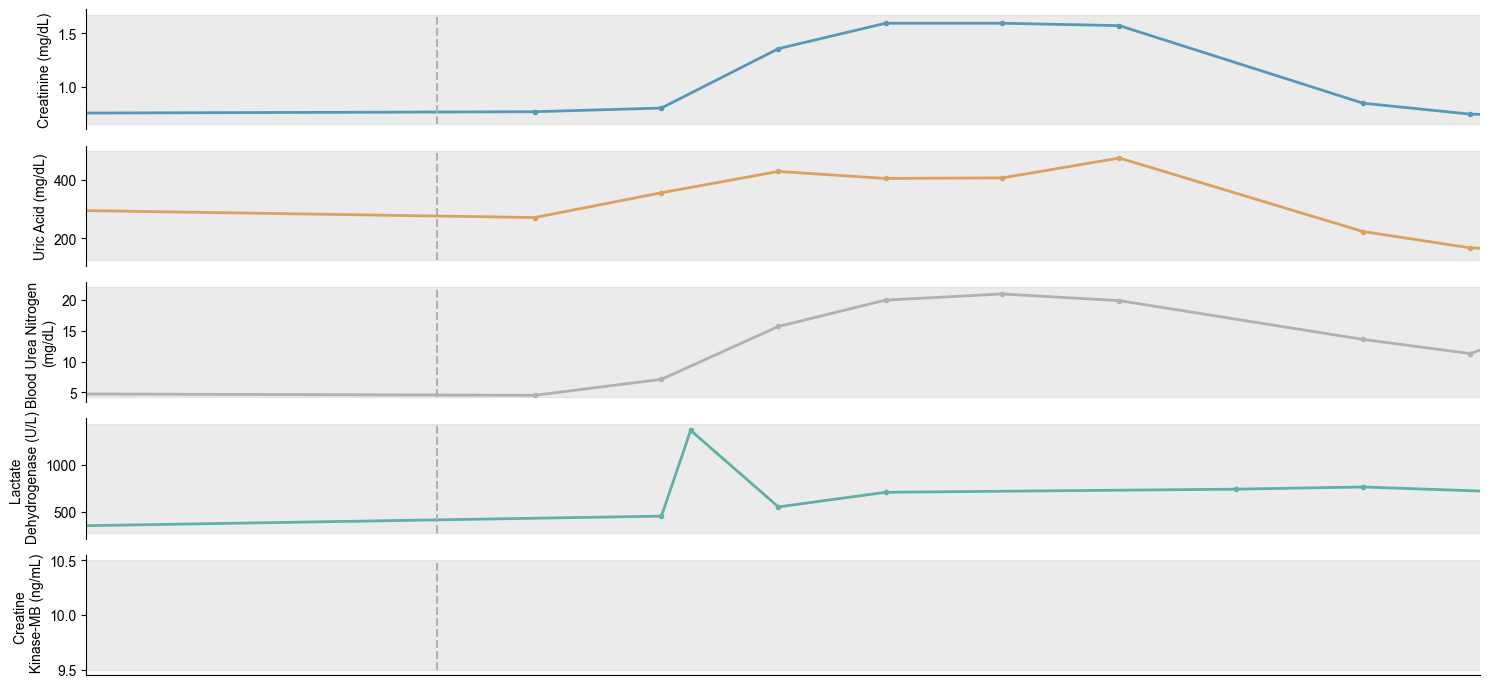

In [7]:
example_sample_index = len(patient_data.data_dynamic) // 2
draw_patient_example(patient_data, example_sample_index)

## Dynamic Prediction Curve v.s. CSA-AKI Label

The threshold is determined by setting the false positive rate to 0.67.

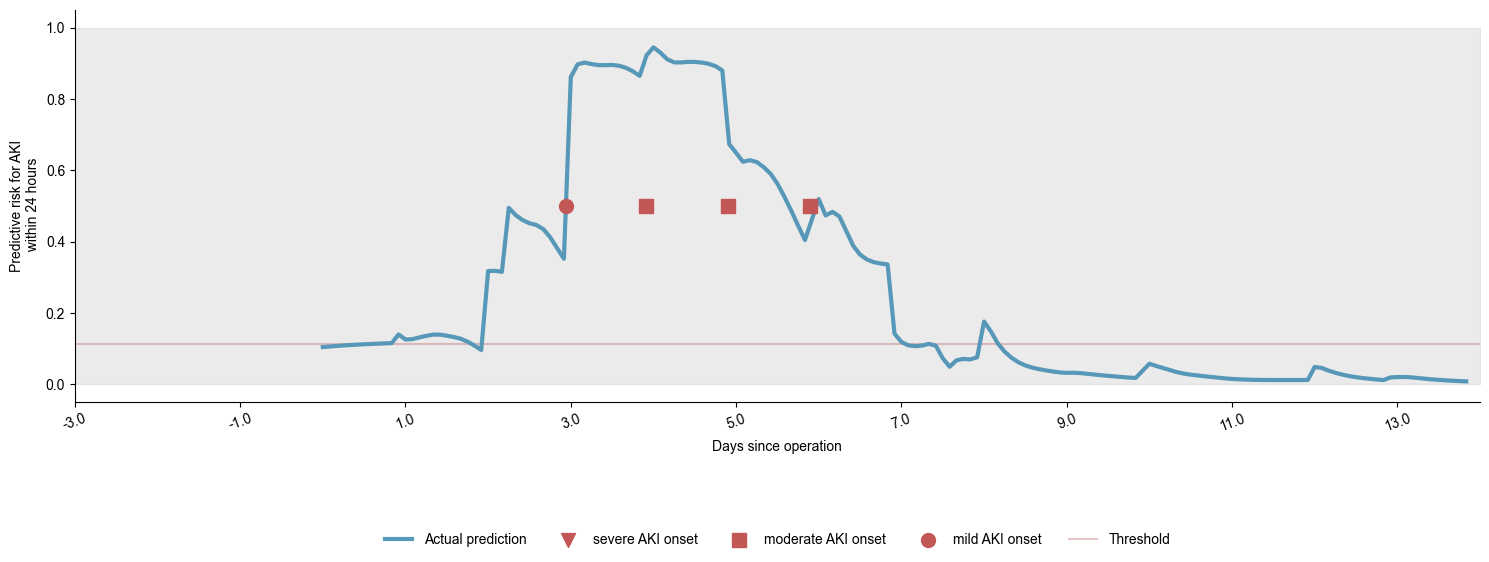

In [8]:

patient_start = int(np.sum([len(p_d.data_dynamic) for p_d in patient_data_list[:example_patient_index]]))
pred_dict = calc_prediction(pred_model, test_dataset, patient_start, patient_start + len(patient_data.data_dynamic))
draw_prediction(patient_data, pred_dict, patient_data.pid)